# **Import Data/Libraries**


In [77]:
!pip install nltk
from nltk import download
download('punkt')

import matplotlib.pyplot as plt
import matplotlib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.tokenize import word_tokenize
import os
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, Bidirectional, SimpleRNN,GRU,LSTM,Dropout
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df1 = pd.read_csv('/content/drive/MyDrive/UNCW/Spring 2024/Classes/CSC 402/CSV Files/Tweets.csv')
df1

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


# **Clean Data**

In [80]:
df = df1[["airline_sentiment","text"]]

In [81]:
df = df1
df['text'] = df['text'].str.lower()
df['airline_sentiment']  = df['airline_sentiment'].str.lower()

In [82]:
# Example contractions dictionary
contractions_dict = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "couldn't": "could not",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'll": "he will",
  "here's": "here is",
  "how's": "how is",
  "i'd": "i would",
  "i'll": "i will",
  "i'm": "i am",
  "isn't": "is not",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mightn't": "might not",
  "mustn't": "must not",
  "shan't": "shall not",
  "she'd": "she would",
  "she'll": "she will",
  "that's": "that is",
  "there's": "there is",
  "they'd": "they would",
  "they're": "they are",
  "they've": "they have",
  "this's": "this is",
  "wasn't": "was not",
  "we'd": "we would",
  "we'll": "we will",
  "weren't": "were not",
  "what's": "what is",
  "when's": "when is",
  "where's": "where is",
  "who's": "who is",
  "why's": "why is",
  "won't": "will not",
  "you'd": "you would",
  "you'll": "you will",
  "you're": "you are",
    "you've": "you have"
}

def expand_contractions(text, contractions_dict):
  """
  Expands contractions in text using a dictionary.

  Args:
    text: The text to be processed.
    contractions_dict: A dictionary of contractions and their expansions.

  Returns:
    The expanded text.
  """
  expanded_text = []
  for word in text.split():
    if word.lower() in contractions_dict:
      expanded_text.append(contractions_dict[word.lower()])
    else:
      expanded_text.append(word)
  return " ".join(expanded_text)

In [83]:
df['text'] = df['text'].apply(expand_contractions, args=(contractions_dict,))
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@virginamerica what @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@virginamerica plus you have added commercials...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@virginamerica i did not today... must mean i ...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@virginamerica it is really aggressive to blas...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@virginamerica and it is a really big bad thin...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@americanair thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@americanair leaving over 20 minutes late flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@americanair please bring american airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@americanair you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [84]:
from nltk.tokenize import word_tokenize
# df['text'] = df['text'].str.lower()
df['text_tokened'] = df['text'].apply(word_tokenize)
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_tokened
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@virginamerica what @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"[@, virginamerica, what, @, dhepburn, said, .]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@virginamerica plus you have added commercials...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[@, virginamerica, plus, you, have, added, com..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@virginamerica i did not today... must mean i ...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"[@, virginamerica, i, did, not, today, ..., mu..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@virginamerica it is really aggressive to blas...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"[@, virginamerica, it, is, really, aggressive,..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@virginamerica and it is a really big bad thin...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"[@, virginamerica, and, it, is, a, really, big..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@americanair thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,"[@, americanair, thank, you, we, got, on, a, d..."
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@americanair leaving over 20 minutes late flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,"[@, americanair, leaving, over, 20, minutes, l..."
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@americanair please bring american airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,"[@, americanair, please, bring, american, airl..."
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@americanair you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),"[@, americanair, you, have, my, money, ,, you,..."


In [85]:
# to replace the mention with people or airline, we need the list of airlines. we can grab airlines from the first dataframe
airlines = df['airline'].str.lower().unique().tolist()
airlines

['virgin america', 'united', 'southwest', 'delta', 'us airways', 'american']

In [86]:
def replace_with_person_or_airline(text_tokens, airlines_dict):
    for i in range(len(text_tokens)):
        if text_tokens[i] == '@' and text_tokens[i+1] in airlines_dict:
            text_tokens[i+1] = "airline"
            i += 2  # Skip next word as well
        elif text_tokens[i] == '@':
            text_tokens[i+1] = "person"
            i += 2  # Skip next word as well
    return text_tokens

In [87]:
df['cleaned'] = df['text_tokened'].apply(replace_with_person_or_airline,args=(airlines,))
df['cleaned']

0                    [@, person, what, @, person, said, .]
1        [@, person, plus, you, have, added, commercial...
2        [@, person, i, did, not, today, ..., must, mea...
3        [@, person, it, is, really, aggressive, to, bl...
4        [@, person, and, it, is, a, really, big, bad, ...
                               ...                        
14635    [@, person, thank, you, we, got, on, a, differ...
14636    [@, person, leaving, over, 20, minutes, late, ...
14637    [@, person, please, bring, american, airlines,...
14638    [@, person, you, have, my, money, ,, you, chan...
14639    [@, person, we, have, 8, ppl, so, we, need, 2,...
Name: cleaned, Length: 14640, dtype: object

In [88]:
df['cleaned']= df['cleaned'].apply(lambda x: [y for y in x if y != '@'])
df['cleaned']

0                          [person, what, person, said, .]
1        [person, plus, you, have, added, commercials, ...
2        [person, i, did, not, today, ..., must, mean, ...
3        [person, it, is, really, aggressive, to, blast...
4        [person, and, it, is, a, really, big, bad, thi...
                               ...                        
14635    [person, thank, you, we, got, on, a, different...
14636    [person, leaving, over, 20, minutes, late, fli...
14637    [person, please, bring, american, airlines, to...
14638    [person, you, have, my, money, ,, you, change,...
14639    [person, we, have, 8, ppl, so, we, need, 2, kn...
Name: cleaned, Length: 14640, dtype: object

In [89]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned'])

sequences = tokenizer.texts_to_sequences(df['cleaned'])
vocab_size = len(tokenizer.index_word)
vocab_size

16223

In [90]:
sequences = pad_sequences(sequences, padding='pre')
sequences.shape

(14640, 46)

In [91]:
le = LabelEncoder()

df['airline_sentiment_labelencoded'] = le.fit_transform(df['airline_sentiment'])

In [92]:
x_train, x_test, y_train, y_test = train_test_split(sequences, df['airline_sentiment_labelencoded'], test_size=0.2, random_state=42)

# **Simple RNN**

In [93]:
# Initialize RNN
model = Sequential([
    Embedding(input_dim=16465,output_dim=2,input_length=46),
    Bidirectional(SimpleRNN(53)),
    Dropout(0.5),
    Dense(12,activation='relu'),
    Dense(3,activation='softmax')
])

# Compile RNN
model.compile(optimizer="rmsprop",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 46, 2)             32930     
                                                                 
 bidirectional_1 (Bidirecti  (None, 106)               5936      
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 106)               0         
                                                                 
 dense_2 (Dense)             (None, 12)                1284      
                                                                 
 dense_3 (Dense)             (None, 3)                 39        
                                                                 
Total params: 40189 (156.99 KB)
Trainable params: 40189 (156.99 KB)
Non-trainable params: 0 (0.00 Byte)
________________

**Fit Model**


In [94]:
history = model.fit(x_train, y_train, epochs=16, validation_data=(x_test[:200], y_test[:200]))

Epoch 1/16
366/366 [==============================] - 50s 129ms/step - loss: 0.9174 - accuracy: 0.6200 - val_loss: 0.8179 - val_accuracy: 0.6350
Epoch 2/16
366/366 [==============================] - 26s 70ms/step - loss: 0.7842 - accuracy: 0.6619 - val_loss: 0.6783 - val_accuracy: 0.7050
Epoch 3/16
366/366 [==============================] - 26s 70ms/step - loss: 0.6578 - accuracy: 0.7234 - val_loss: 0.6488 - val_accuracy: 0.6900
Epoch 4/16
366/366 [==============================] - 27s 75ms/step - loss: 0.5918 - accuracy: 0.7568 - val_loss: 0.5944 - val_accuracy: 0.7300
Epoch 5/16
366/366 [==============================] - 25s 69ms/step - loss: 0.5418 - accuracy: 0.7841 - val_loss: 0.6220 - val_accuracy: 0.7350
Epoch 6/16
366/366 [==============================] - 24s 64ms/step - loss: 0.5032 - accuracy: 0.8017 - val_loss: 0.5808 - val_accuracy: 0.7600
Epoch 7/16
366/366 [==============================] - 25s 69ms/step - loss: 0.4744 - accuracy: 0.8225 - val_loss: 0.5917 - val_accuracy

# **Results**

**Compute Accuracy**

In [95]:
# Predict on the test data
predictions = model.predict(x_test[-200:])

# Convert predictions to class labels (assuming predictions are in one-hot encoded format)
predicted_labels = predictions.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test[-200:], predicted_labels) # GRADING, COMPARING YOUR ANSWERS TO SOLUTION KEY
print(f"Accuracy: {accuracy}")

7/7 [==============================] - 0s 13ms/step
Accuracy: 0.835


In [96]:
print(predicted_labels[:20])

[2 0 2 0 0 0 0 1 0 1 2 0 0 0 0 0 0 0 0 0]


**Convert to Labels**

In [97]:
# Convert
predicted_labels_str = le.inverse_transform(predicted_labels)

# Print the first 20 predicted labels
print(predicted_labels_str[:20])

['positive' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'neutral' 'negative' 'neutral' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative']


**Create Histogram of Predicted vs. Actual Labels**

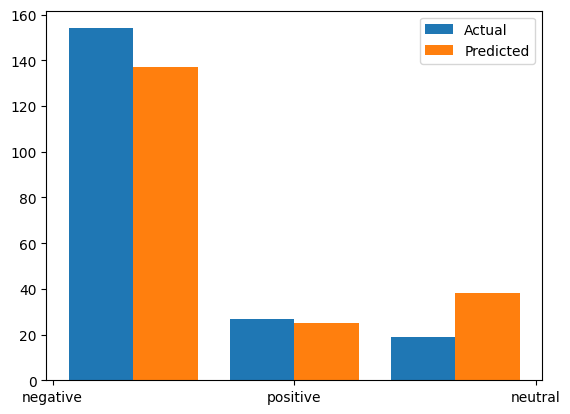

In [98]:
actual_labels = df['airline_sentiment'][-200:]
predicted_labels = predicted_labels_str
plt.hist([actual_labels, predicted_labels], bins=3, histtype='bar', rwidth=0.8)
plt.xticks([0, 1, 2], ['negative', 'positive', 'neutral'])
plt.legend(['Actual', 'Predicted'])
plt.show()